# Notebook

In the EDA step, the prepared datasets from [1_Data_Prep](https://github.com/Rudinius/Bike_usage_Bremen/blob/4f39d66836e0585770c37d1cf261b0c0dd95101f/1_Data_Prep.ipynb) are loaded. The data is then further explored and analyzed for deeper understandung and imputing of data.

<a name="content"></a>
# Content 

* [1. Import libraries and mount drive](#1)
* [2. Import processed datasets](#2)
* [3. Description of datasets](#3)
* [4. Details cyclists dataset](#4)
  * [4.1. Total counting stations](#4.1.)
  * [4.2. Counting stations in detail](#4.2.)
  * [4.3. Dependency on day of the week](#4.3.)
  * [4.4. Handling "0.0"-Values, outliers and imputing](#4.4.)
* [5. Details weather dataset](#5)
* [6. Correlation between datasets](#6)
  * [6.1. Correlation of weather features](#6.1.)
  * [6.2. Correlation cyclist and weather dataset](#6.2.)
  * [6.3. Correlation cyclist and holiday dataset](#6.3.)
  * [6.4. Correlation cyclist and vacation dataset](#6.4.)
* [7. Locations of counting stations](#7)
* [8. Summary and next steps](#8)

<a name="1"></a>
# 1.&nbsp;Import libraries

[Content](#content)

In [ ]:
# Import libraries
import datetime
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
# Install package ipyleaflet since it is not part of the standard packages
# of Google Colab

import importlib

# Check if package is installed
package_name = "ipyleaflet"
spec = importlib.util.find_spec(package_name)
if spec is None:
    # Package is not installed, install it via pip
    !pip install ipyleaflet
else:
    print(f"{package_name} is already installed")

from ipyleaflet import Map, CircleMarker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00


<a name="2"></a>
#2.&nbsp;Import processed datasets

[Content](#content)

Next, we will import the processed dataset from [1_Data_Prep](../Bike_usage_Bremen/1_Data_Prep.ipynb).

In [ ]:
# Set base url
url = "https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/data/"

In [ ]:
# Import dataset cyclists

# We will also parse the date column as datetime64 and set it to the index column
df_cyclist = pd.read_csv(url + "2023-03-26_processed_cyclists_2013-2022.csv", 
                         parse_dates=[0], index_col=[0])

# Check the correct loading of dataset
df_cyclist.head()

,GrafMoltkeStrEast,GrafMoltkeStrWest,HastedterBrStr,LangemarckStrEast,LangemarckStrWest,Osterdeich,RadwegKleineWeser,SchwachhauserRing,WachmannStrAusSouth,WachmannStrEinNorth,WilhelmKaisenBrEast,WilhelmKaisenBrWest
date,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,1228,563.0
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,4024,2355.0
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,5013,3028.0
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,2382,1121.0
2013-01-05,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,5736,3221.0


In [ ]:
# Import dataset weather

# We will also parse the date column as datetime64 and set it the index column
df_weather = pd.read_csv(url + "2023-03-26_processed_weather_2013-2022.csv", 
                         parse_dates=[0], index_col=[0])

# Check the correct loading of dataset
df_weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2013-01-01,6.9,3.5,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0
2013-01-02,5.6,4.2,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30
2013-01-03,8.6,6.0,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0
2013-01-04,8.8,6.8,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0
2013-01-05,7.7,6.5,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0


In [ ]:
# Import dataset geo-locations

# We will set first column to the index column
df_geolocations = pd.read_csv(url + "2023-03-26_processed_geolocations.csv", index_col=[0])

# Check the correct loading of dataset
df_geolocations.head()

,latitude,longitude
name,,
GrafMoltkeStrEast,53.0778,8.8330
GrafMoltkeStrWest,53.0781,8.8328
HastedterBrStr,53.0612,8.8528
LangemarckStrEast,53.0764,8.7974
LangemarckStrWest,53.0765,8.7969


In [ ]:
# Import dataset geo-locations

# We will set first column to the index column and use ; as separator
df_holidays = pd.read_csv(url + "raw_holidays_2013-2022.csv", parse_dates=[0], index_col=[0], sep=";")

# Check the correct loading of dataset
df_holidays.head()

,Holiday
date,
2013-01-01,Neujahr
2013-03-29,Karfreitag
2013-04-01,Ostermontag
2013-05-01,Tag der Arbeit
2013-05-09,Christi Himmelfahrt


In [ ]:
# Import dataset geo-locations

# We will set first column to the index column and use ; as separator
df_vacation = pd.read_csv(url + "raw_vacation_2013-2022.csv", parse_dates=[0], index_col=[0], sep=";")

# Check the correct loading of dataset
df_vacation.head()

,Vacation
date,
2013-01-01,Weihnachtsferien
2013-01-02,Weihnachtsferien
2013-01-03,Weihnachtsferien
2013-01-04,Weihnachtsferien
2013-01-05,Weihnachtsferien


<a name="3"></a>
#3.&nbsp;Description of datasets

[Content](#content)

**1. Cyclist Data**

The cyclist dataset contains the daily amount of cyclists for different counting stations. Each column is the name of a different counting station.

<center>

Table 1: Features of cyclist data

| Name | Description | Unit |
| :--- | ---: | ---: |
| date | Date | |
| GrafMoltkeStrEast | daily value | pcs. |
| ... | ... | ... |
| WilhelmKaisenBrWest | daily value | pcs. |

</center>

**2. Weather Data**

The weather dataset contains the data listed below. Each value corresponds to **one day**.

<center>

Table 2: Features of weather data

| Name | Description | Unit |
| :--- | ---: | ---: |
| date | Date | |
| tavg | Avg. Temperature | C° |
| tmin | Min. Temperature | C° |
| tmax | Max. Temperature | C° |
| prcp | Total Precipitation | mm |
| snow | Snow Depth |  |
| wdir | Wind Direction | ° |
| wspd | Wind Speed | km/h |
| wpgt | Peak Gust | km/h |
| pres | Air Pressure | hPa |
| tsun | Sunshine Duration | m |

</center>

**3. Geolocations**

The dataset geolocations contains the longitude and latitude values of the counting stations.

<center>

Table 3: Features of geolocation data

| Name | Description | Unit |
| :--- | ---: | ---: |
| names | Names of stations | |
| latitude | latitude value | ° |
| longitude | longitude value | ° |

</center>

**4. Holidays**

The dataset `Holidays` contains all the public holidays between 2013 and 2022.

<center>

Table 4: Features of holidays data

| Name | Description | Unit |
| :--- | ---: | ---: |
| date | Date | |
| Holiday | Name of holiday |  |

</center>

**5. Vacation**

The dataset `Vacation` contains all the school vacation days in the state of Bremen between 2013 and 2022.

<center>

Table 5: Features of geolocation data

| Name | Description | Unit |
| :--- | ---: | ---: |
| date | Date | |
| Vacation | Name of vacation |  |

</center>

<a name="4"></a>
#4.&nbsp;Details cyclists dataset

[Content](#content)

Next, we will look in detail on the cyclists dataset to get an intuition about the values, see the distribution and missing values.

In [ ]:
#df_cyclist.info()

In [ ]:
# helper function
def missing_percent(df):
  """
  Function that takes a dataframe as input and return a new dataframe
  with the column names as index and the new columns 'Absolut missing' and '% missing'

  Args:
        df (pandas dataframe (m, n)): Data matrix, m rows, n columns
  Returns:
        df_missing (pandas dataframe (m,n )): Data matric, m rows, n columns
  """

  missing_abs = pd.Series(df.isna().sum(), name="Absolut missing")
  missing_percent = pd.Series(df.isna().sum()/df.shape[0]*100, name="% missing")

  df_missing = pd.concat([missing_abs, missing_percent],axis=1)
  df_missing.index.names = ["column"]
  return df_missing

In [ ]:
missing_percent(df_cyclist)

,Absolut missing,% missing
column,,
GrafMoltkeStrEast,30,0.821468
GrafMoltkeStrWest,76,2.081051
HastedterBrStr,16,0.438116
LangemarckStrEast,13,0.355969
LangemarckStrWest,1,0.027382
Osterdeich,1,0.027382
RadwegKleineWeser,102,2.792990
SchwachhauserRing,0,0.000000
WachmannStrAusSouth,91,2.491785


The dataset has 3652 entries which equals to 1 value per day over 10 years. Every coloumn has missing values except `SchwachhauserRing` and `WilhelmKaisenBrEast`. As we can see, between $0\%$ and $4.87\%$ of values are missing.

The amount of missing data is not high. After further analyzing the data (e.g., outliers) we will think about an imputing strategy.

<a name="4.1."></a>
## 4.1. Total counting stations

[Content](#content)

We will first analyze the entire amount of cyclers. This means we will look at the sum of all the stations.

In [ ]:
# Create a new series with the sum over all single stations
s_cyclist_total = df_cyclist.sum(axis=1)
s_cyclist_total.name = "Total"

# Check the series
#s_cyclist_total.head()

Next, we will plot this dataset to get a better intuition.

In [ ]:
# Calulate the moving average for one year
window_size = 365
rolling_mean = s_cyclist_total.rolling(window_size).mean()

# Create plotly express figure
fig = px.line(title="Total amount of cyclers from 2013 to 2022")
fig.add_scatter(x=s_cyclist_total.index, y=s_cyclist_total,
                name="Original Data", mode='lines', line=dict(color='blue'))
fig.add_scatter(x=rolling_mean.index, y=rolling_mean,
                name="Moving Average", mode='lines', line=dict(color='red'))

# Add vertical line and annotations to the plot
fig.add_vline(x='2020-03-17', line_width=3, line_dash="dash", line_color="black")
fig.add_annotation(x='2020-03-17', text="Start of COVID measures", 
                   showarrow=False, font=dict(color="black", size=15))

# Update axis labels
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="# of cyclers")

# Update the legend position
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

# Show the figure
fig.show()

On first glance, the overall amount of bicycle rides inside the city of Bremen seems to be very stable with only minor changes between years. Furthermore even the beginn of COVID measurements in March 2023 does not seem to have a great impact on the overall amount.


Next we will look at the distribution of the data.

In [ ]:
# Calculate mean and standard deviation
mean = np.mean(s_cyclist_total)
std = np.std(s_cyclist_total)

# Calculate PDF
pdf = norm.pdf(s_cyclist_total.sort_values(), loc=mean, scale=std)

# Create histogram trace
hist_trace = go.Histogram(x=s_cyclist_total, nbinsx=30, name="Hist Data", yaxis="y1")

# Create line trace for PDF
pdf_trace = go.Scatter(x=s_cyclist_total.sort_values(), y=pdf, name="Probability Density", 
                       mode="markers", line=dict(color="red"), yaxis="y2")

# Set layout
layout = go.Layout(
    title="Distribution of Data",
    xaxis=dict(title="Cyclist Data"),
    yaxis=dict(title="Hist Data", color="blue"),
    yaxis2=dict(title="Probability Density", color="red", overlaying="y", side="right", showgrid=True, showticklabels=True),
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99)
)

# Combine traces into a figure
fig = go.Figure(data=[hist_trace, pdf_trace], layout=layout)

# Show the figure
fig.show()

The overall data distribution of the cyclist data is Gaussian Distributed with no extreme outliers. 

Next we look at the year-to-year development of the data.

In [ ]:
# Group the series by yearly sum values
s_yearly_totals = s_cyclist_total.groupby(pd.Grouper(freq='Y')).sum()

# Create series of annotations with yearly changes in cycling numbers
annotations = []
for i in range(len(s_yearly_totals)-1):

    change = (s_yearly_totals[i+1]/s_yearly_totals[i])-1
    annotations.append(
        dict(
            x=s_yearly_totals.index[i+1].year, y=s_yearly_totals[i+1],
            text=f"{change:+.2f}%",
            showarrow = False,
            xref="x",
            yref="y",
            yshift=20,
            font=dict(color="black", size=15)
        )
    )

fig = px.bar(x=s_yearly_totals.index.year, y=s_yearly_totals)

fig.update_layout(
    title="Yearly changes in % compared to previous year",
    xaxis_title="Year",
    yaxis_title="Yearly total numbers",
    yaxis_range=[0.5e7, 1.3e7],
    annotations=annotations
)

# Add mean and std as annotations
mean = s_yearly_totals.mean()
std = s_yearly_totals.std()

fig.add_annotation(
        x=2014,
        text=f"Average: {mean:.2f}%",
        showarrow=False,
        xref="x",
        yref="y",
        yshift=20,
        font=dict(color="black", size=15)
        )

fig.add_annotation(
        x=2014, 
        text=f"Std.: {std:.2f}%",
        showarrow=False,
        xref="x",
        yref="y",
        yshift=40,
        font=dict(color="black", size=15)
        )

fig.show()

**Oberservation:** 

During the observed period from 2013 to 2022, the overall number increased from $10.33$ million to $12.01$ million. Apart from this, there is no clear trend visible as years with an increase in numbers are followed by years with a decrese and vice versa. 

Covid does not seem to have had an immediate effect on the overall number of cyclers. The COVID measures where introduced in March 2020 and this year was the second strongest in the observed time frame in terms of total numbers and a $5$% increase compared to the previous year. However the increase by $5$% is not unusual compared to the previous years. With an average over all observed years of $11,571,687$ cyclers and a standard deviation of $604,622$ cyclers the year 2020 is only slightly outside the standard deviation. If this is caused by the COVID measures cannot be said.
It is very possible, that different effects overlap and therefore it cannot be said that different effects like natural changes in weather as well as artifical changes like homeoffice rules (less commute), people taking less public transport due to fear of COVID and therefore use more personal transport like bycicles (more commute via bike) strongly impact the overall number significantly. The following years 2021 and 2022 are well within the standard deviation, which can be concluded, that COVID did not have a strong effect on the development of the bycicle numbers. 

The distribution of the data is Gaussian (normal distributed). This means that the data is equally distributed around the average value with approximately 68% of the values within one standard deviation of the mean, and approximately 95% of the values within two standard deviations of the mean. There are no extreme outliers in the total amount of cyclists.

<a name="4.2."></a>
## 4.2. Counting stations in detail

[Content](#content)

Next we will look more closly on single counting sations to see, if some of them follow different rules and distributions. 
First, we are going to plot the time series data for each counting stations over all years.

In [ ]:
#Get the names of the stations
names_stations = df_cyclist.columns.values

# Create figure
fig = make_subplots(rows=6, cols=2,
                    subplot_titles=df_cyclist.columns.values, 
                    vertical_spacing=0.05, horizontal_spacing=0.05)

fig.update_layout(height=1800, title="Overview of all the counting stations")

# Reshape the names_stations 1D column into a 2D array to fit the amount of axes to print
names = names_stations.reshape(6,2)

for (m,n), _ in np.ndenumerate(names):

    # Create trace
    trace = px.line(df_cyclist, x=df_cyclist.index, y=names[m][n]).data[0]

    # Plot data
    fig.add_trace(trace, row=m+1, col=n+1)

    # Add vertical line and annotations to the plot
    fig.add_vline(x='2020-03-17', line_width=1, line_dash="dash", line_color="black")
    fig.add_annotation(x='2020-03-17', y=0, text="Start of COVID measures", showarrow=False, row=m+1, col=n+1)

fig.show()

Overall the number of cyclists seems to follow an expected yearly cycle with higher numbers in the summer and lower numbers in the winter. Some stations contain huge outliers, which could be due to certain events in the city like "Bremen Skate Night" where also people with bycicles participate or demonstrations and similar. Also for the individual stations, no extreme impact of COVID measures can be seen.

**Data distribution:**

Next, we will have a look on the distribution of the data.

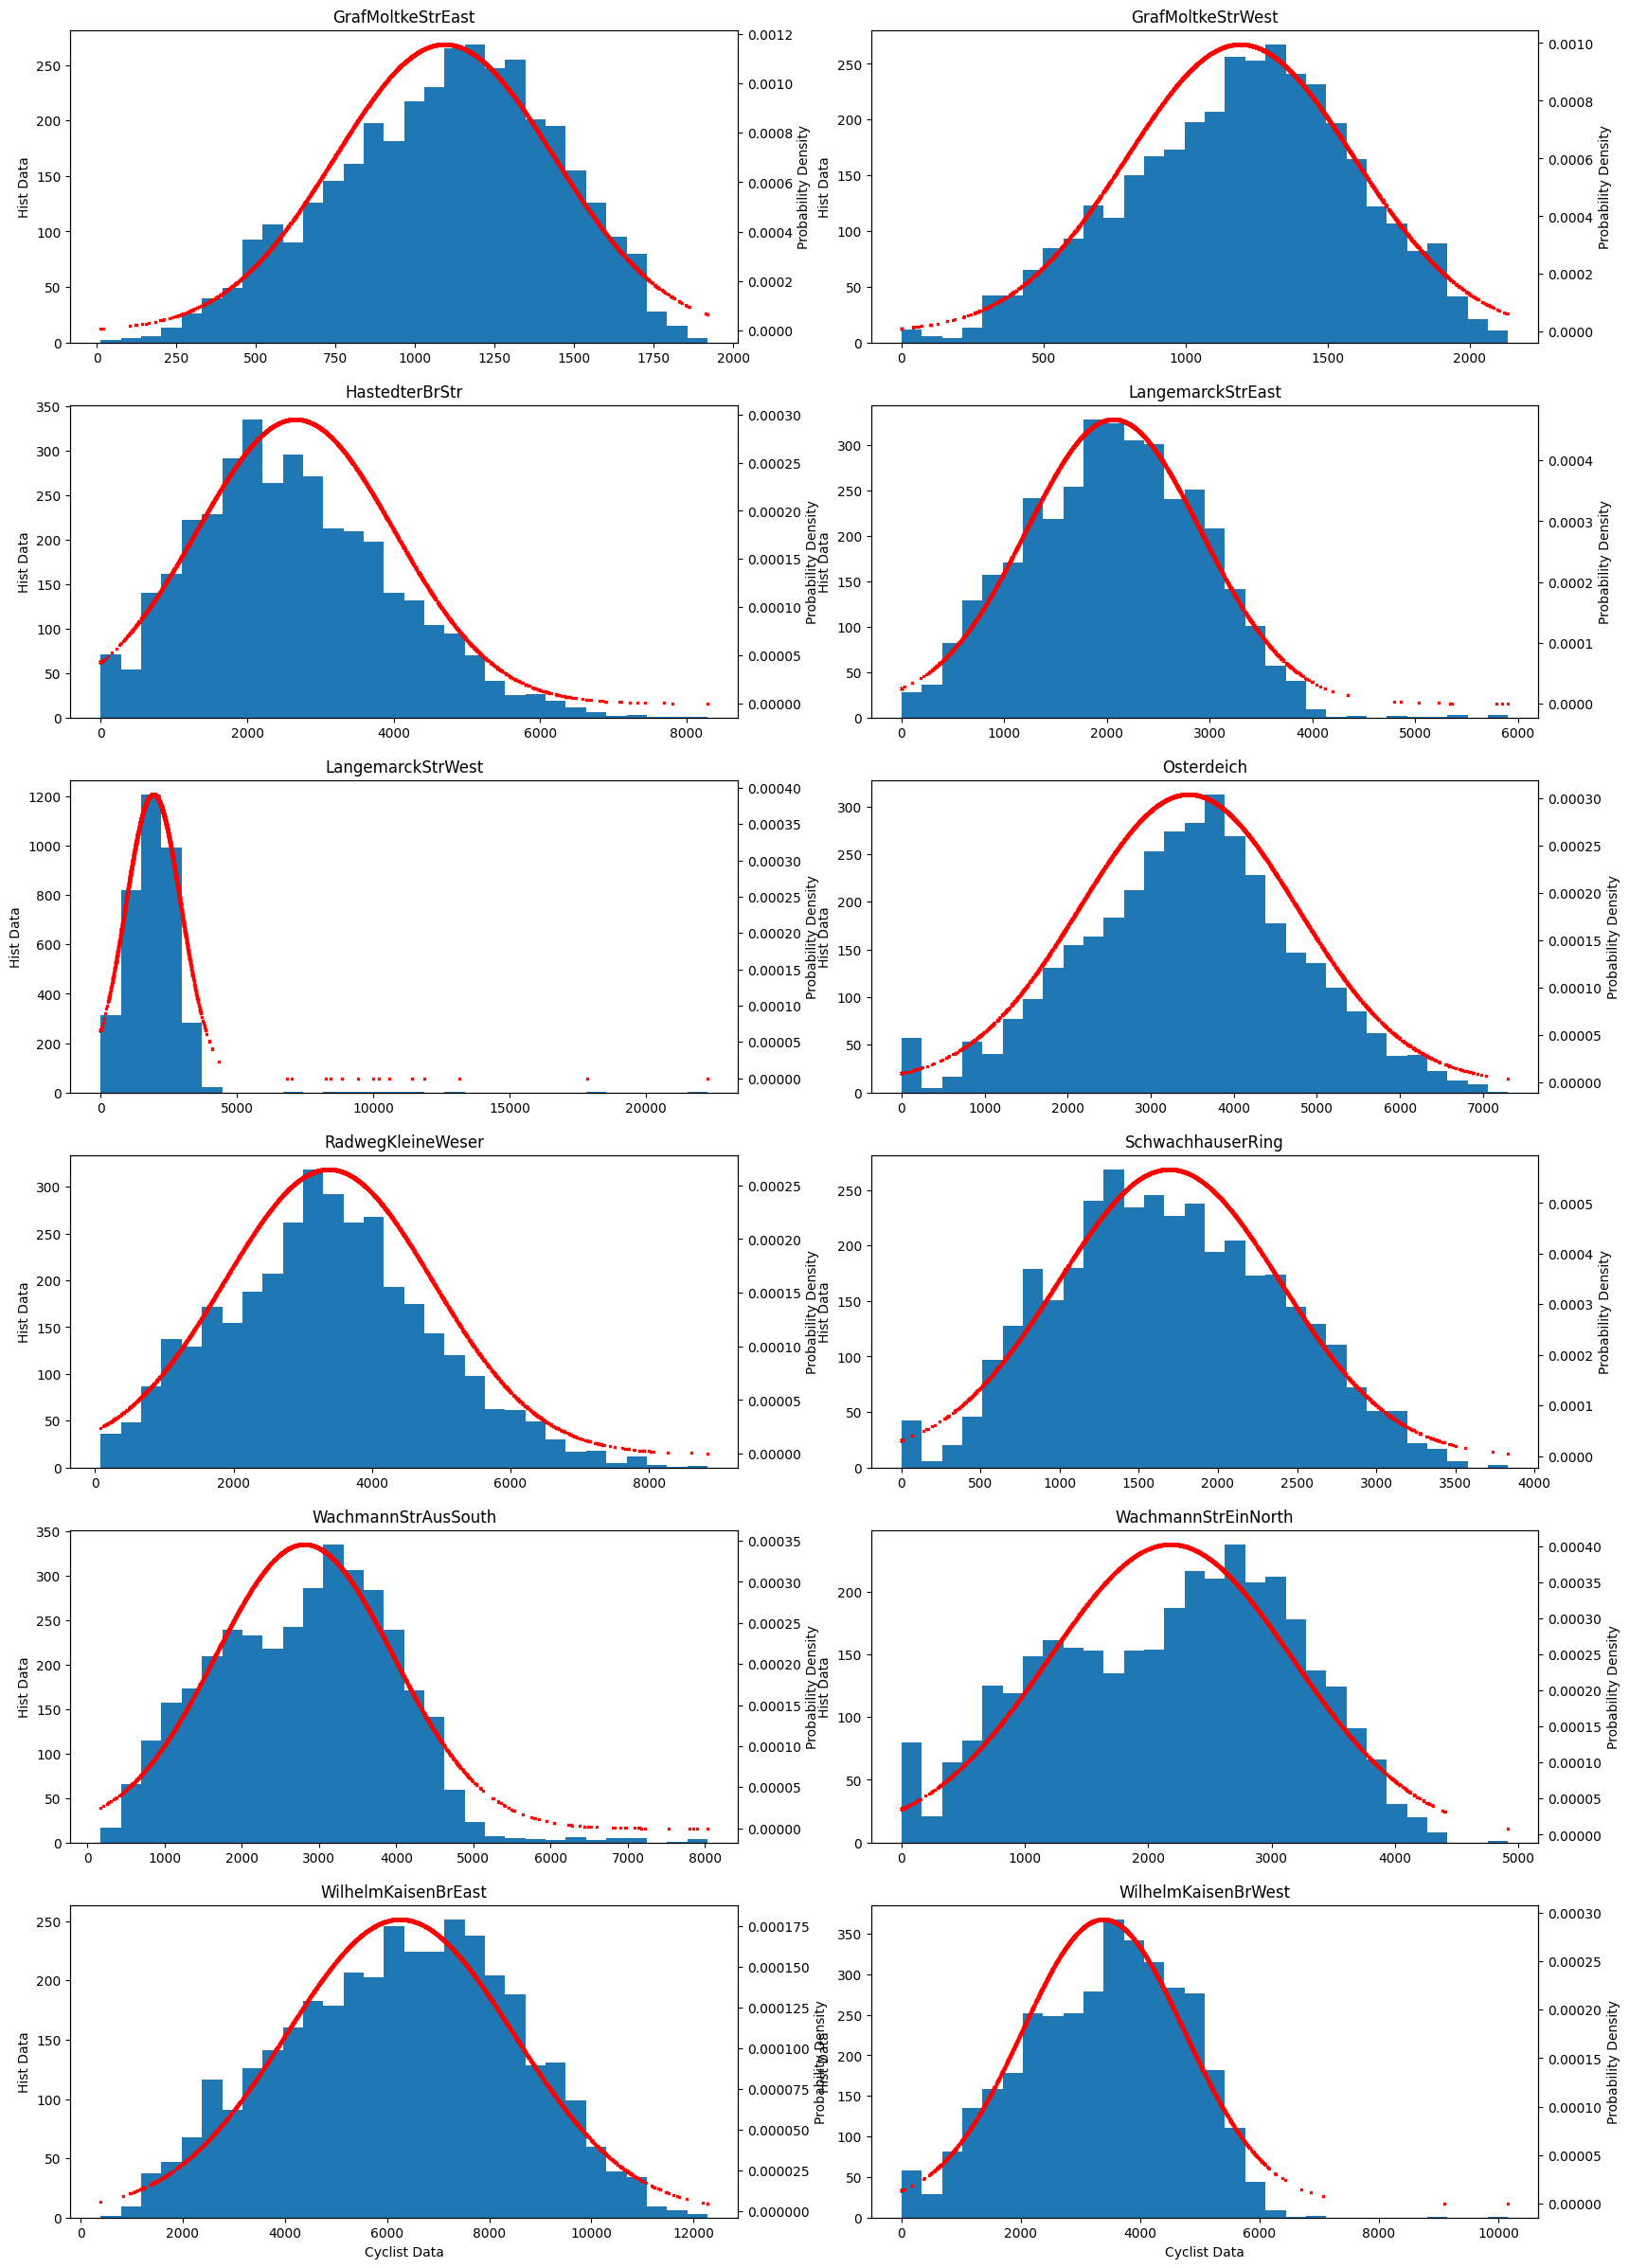

In [ ]:
# Get the names of the stations
names_stations = df_cyclist.columns.values

# Reshape the names_stations 1D column into a 2D array to 
# fit the amount of axes to print
names = names_stations.reshape(6,2)

# Create figure
fig, axs = plt.subplots(6,2, figsize=(20,30), sharex=False, sharey=False)

axs[5][0].set_xlabel("Cyclist Data")
axs[5][1].set_xlabel("Cyclist Data")

for (m,n), ax in np.ndenumerate(axs):
    
    # Sort the dataframe
    _sorted = df_cyclist[names[m][n]].sort_values()

    mu = df_cyclist[names[m][n]].mean()
    std = df_cyclist[names[m][n]].std()

    # Create probability distribution function
    pdf = norm.pdf(_sorted,mu,std)
    
    ax2 = ax.twinx()
    ax.hist(_sorted, bins=30);
    ax2.plot(_sorted, pdf, "xr", markersize=2)

    ax.set_title(names[m][n])
    
    ax.set_ylabel('Hist Data')
    ax2.set_ylabel('Probability Density')

As seen before when looking at the averall distribution of the data, also the single counting stations are Gaussian distributed. Some stations contain few big outliers.

The station `LangemarckStrWest` has the biggest outliers.

<a name="4.3."></a>
## 4.3. Dependency on day of the week
[Content](#content)

Finally, we also want to investigate, what impact the day of the week has on the value. For this, we first need to add column `Weekday` to the dataframe.

In [ ]:
# Create a pandas series with the date as index and day of the week as column
s_weekdays = pd.Series(df_cyclist.index.dayofweek, index=pd.to_datetime(df_cyclist.index), name="Weekday")
s_total = pd.Series(df_cyclist.sum(axis=1), name="Total")

# Concatenate the pandas series with the pandas dataframe
df_cyclist_weekdays = pd.concat([s_weekdays, df_cyclist], axis=1)
df_cyclist_weekdays = pd.concat([df_cyclist_weekdays, s_total], axis=1)

# Check dataframe
df_cyclist_weekdays

,Weekday,GrafMoltkeStrEast,GrafMoltkeStrWest,HastedterBrStr,LangemarckStrEast,LangemarckStrWest,Osterdeich,RadwegKleineWeser,SchwachhauserRing,WachmannStrAusSouth,WachmannStrEinNorth,WilhelmKaisenBrEast,WilhelmKaisenBrWest,Total
date,,,,,,,,,,,,,,
2013-01-01,1,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,1228,563.0,5795.0
2013-01-02,2,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,4024,2355.0,19494.0
2013-01-03,3,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,5013,3028.0,24851.0
2013-01-04,4,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,2382,1121.0,13475.0
2013-01-05,5,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,5736,3221.0,29359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1,693.0,612.0,1495.0,1062.0,915.0,2123.0,NaN,947,1612.0,1386.0,3841,2063.0,16749.0
2022-12-28,2,643.0,585.0,1076.0,884.0,820.0,1819.0,NaN,699,1284.0,1008.0,3215,1726.0,13759.0
2022-12-29,3,654.0,648.0,NaN,1014.0,907.0,2013.0,NaN,795,1536.0,1194.0,3774,1913.0,14448.0


In [ ]:
# Plot the boxplot
fig = px.box(df_cyclist_weekdays, x="Weekday", y="Total")

fig.update_layout(title="Total distribution for weekdays")

# Rename the x-axis labels
fig.update_layout(xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2, 3, 4, 5, 6],
        ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ))

fig.show()

In [ ]:
#Get the names of the stations
names_stations = df_cyclist.columns.values

# Create figure
fig = make_subplots(rows=6, cols=2,
                    subplot_titles=df_cyclist.columns.values, 
                    vertical_spacing=0.05, horizontal_spacing=0.05)

fig.update_layout(height=1800, title="Single distributions for weekdays")

# Reshape the names_stations 1D column into a 2D array to fit the amount of axes to print
names = names_stations.reshape(6,2)

for (m,n), _ in np.ndenumerate(names):

    # Create trace
    trace = px.box(df_cyclist_weekdays, x="Weekday", y=names[m][n]).data[0]

    # Plot data
    fig.add_trace(trace, row=m+1, col=n+1)

    # Update the x-axis tick values and labels
    fig.update_xaxes(tickmode='array', tickvals=[0, 1, 2, 3, 4, 5, 6], 
                     ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                     row=m+1, col=n+1)

fig.show()

Overall 3 different groups with similar values can be seen.

1.   Monday to Friday have the highest values
2.   Saturday has a clearly smaller value than the group before
3.   Sunday has the smallest values

This distribution variess from station to station but resembles the overall trend. 

<a name="4.4."></a>
## 4.4. Handling "0.0"-Values, outliers and imputing
[Content](#content)

As we could see during the analysis so far, the different counting stations have a similar behaviour overall with a similar distribution and just a different scaling. The mean value of the stations is between ~ 1092  and ~ 6249 . Judging from this,  0.0 -values seem to be very unlikely and appear in the trends to be outliers, that not a single bicycle was counted during a full day. For this reason we will treat all  0.0 -values as outliers and set those to NaN Values. Those values most likely are an error in measurement e.g. caused by road constructions so that the counting stations could not count any number of bicyles.

Also in a Gaussian distribution, about  99.7%  of values fall within 3 times of the standard deviation. Therefore we will consider everything above/below this an outlier and will set those values to NaN as well.

Then we will use the forward fill strategy for imputing the missing NaN values.

In [ ]:
# Create a copy of the original dataset
df_cyclist_replaced = df_cyclist.copy()

# Cycle through the columns and calculate for each the mean and standard deviation
# Replace the outliers with np.NAN
# Save the result in new dataframe
for name in df_cyclist.columns:
  
    mu = df_cyclist.loc[:,name].mean()
    std = df_cyclist.loc[:,name].std()
    mask = (df_cyclist[name] == 0.0) | (df_cyclist[name] > (mu+3*std))

    df_cyclist_replaced.loc[mask, name] = np.NAN

# Use forward fill strategy to fill up missing NaN values
df_cyclist_imputed = df_cyclist_replaced.fillna(method="ffill")

# Check the result
missing_percent(df_cyclist_imputed)

,Absolut missing,% missing
column,,
GrafMoltkeStrEast,0,0.0
GrafMoltkeStrWest,0,0.0
HastedterBrStr,0,0.0
LangemarckStrEast,0,0.0
LangemarckStrWest,0,0.0
Osterdeich,0,0.0
RadwegKleineWeser,0,0.0
SchwachhauserRing,0,0.0
WachmannStrAusSouth,0,0.0


<a name="5"></a>
# 5.&nbsp;Details weather dataset
[Content](#content)

Next, we will have a detailed look on the weather dataset.

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2013-01-01 to 2022-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    3652 non-null   float64
 1   tmin    3652 non-null   float64
 2   tmax    3652 non-null   float64
 3   prcp    3652 non-null   float64
 4   snow    3439 non-null   float64
 5   wdir    3642 non-null   float64
 6   wspd    3652 non-null   float64
 7   wpgt    3651 non-null   float64
 8   pres    3652 non-null   float64
 9   tsun    3652 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 313.8 KB


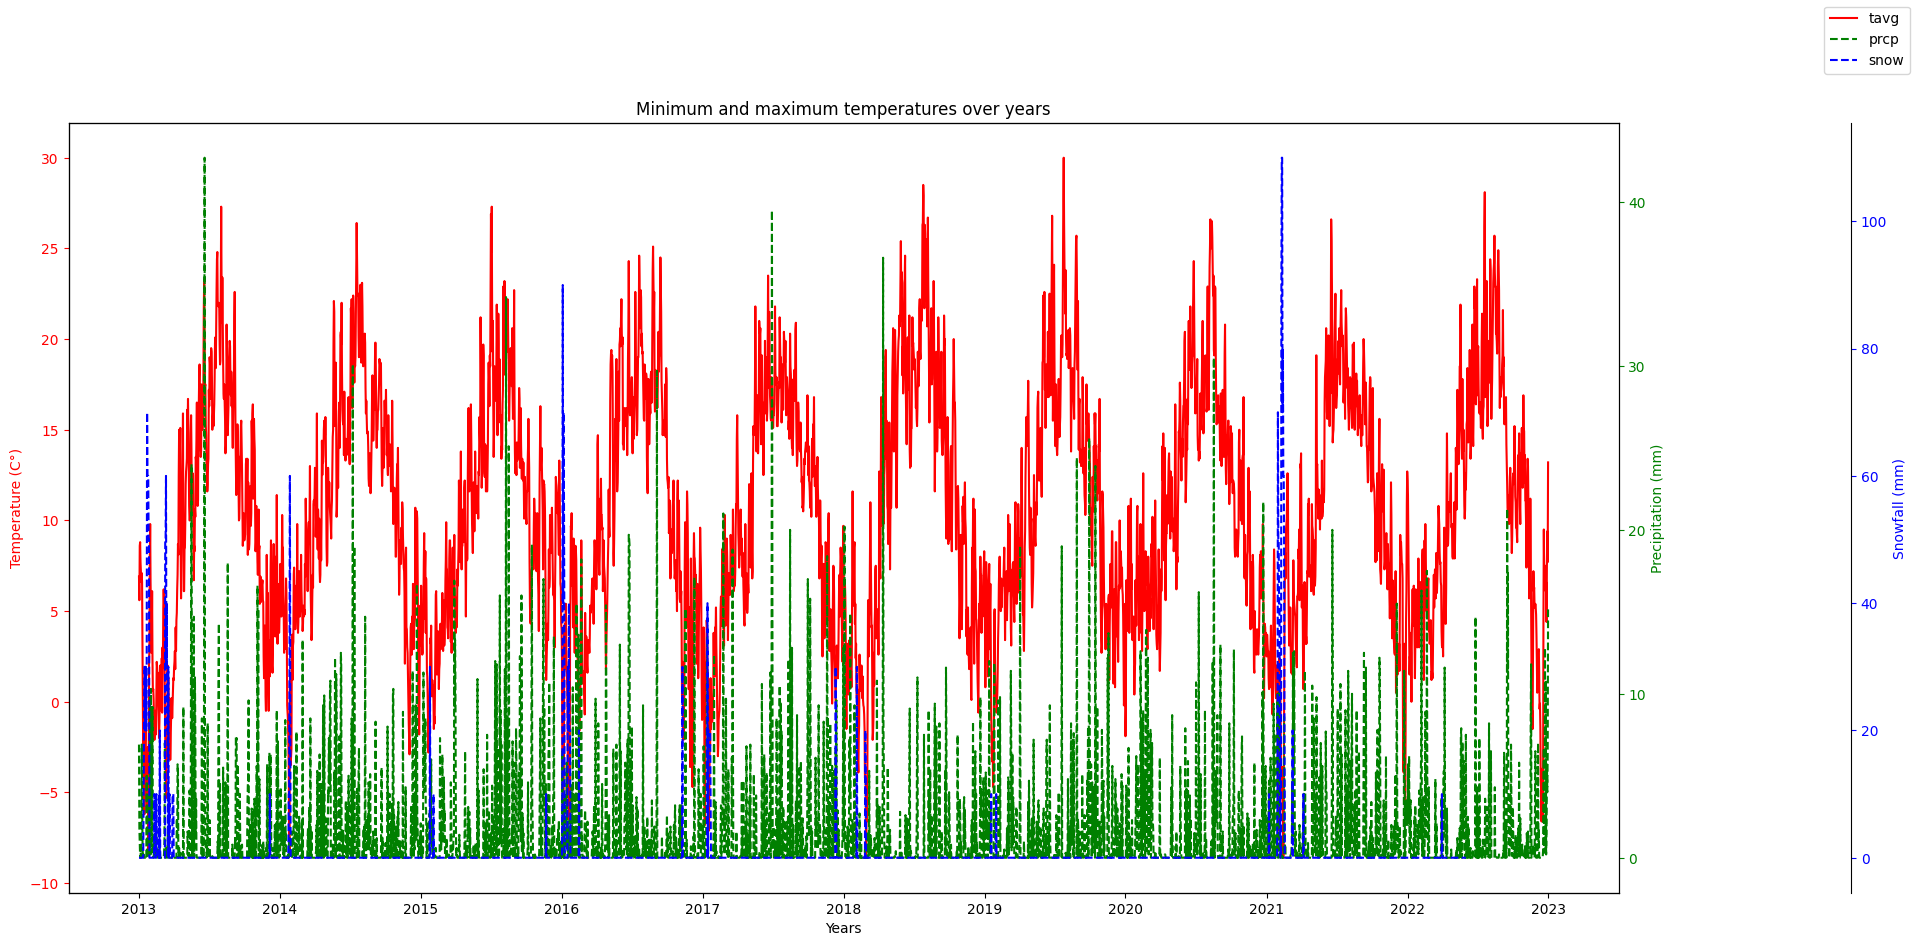

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax2 = ax.twinx()
ax3 = ax.twinx()

# Plotting
ax.plot(df_weather.index,"tavg", "r-", data=df_weather)
ax2.plot(df_weather.index,"prcp", "g--", data=df_weather)
ax3.plot(df_weather.index,"snow", "b--", data=df_weather)

# Formatting plot
fig.legend(["tavg","prcp","snow"])
ax3.spines["right"].set_position(("axes",1.15))

plt.title("Minimum and maximum temperatures over years")
ax.set_ylabel("Temperature (C°)", color="red")
ax.set_xlabel("Years")
ax2.set_ylabel("Precipitation (mm)", color="green")
ax3.set_ylabel("Snowfall (mm)", color="blue")

ax.tick_params(axis="y", colors="red")
ax2.tick_params(axis="y", colors="green")
ax3.tick_params(axis="y", colors="blue")

The diagram above shows the data for `tavg`, `prcp` and `snow`. To not further overload the diagram, the other values are not shown. This diagram should only give an intuition about the dataset and will be looked at more in detail. As expected, the data is very seasonal with high temperatures in summer, lower temperatures and snow in winter as well as seasonal rain.

**Missing data:**

In [ ]:
missing_percent(df_weather)

,Absolut missing,% missing
column,,
tavg,0,0.000000
tmin,0,0.000000
tmax,0,0.000000
prcp,0,0.000000
snow,213,5.832421
wdir,10,0.273823
wspd,0,0.000000
wpgt,1,0.027382
pres,0,0.000000


The weather dataset has 3652 entries which is equal to one entry per day over 10 years. There only missing values for `snow` ($5.83 \%$), `wdir` ($0.27 \%$), and `wpgt` ($0.03\%$).

Wind direction `wdir` as well as wind gusts `wpgt` have a neglectable amount of missing data. Those values could be easily imputed without causing any harm to our model later. 
For the `snow` value we will further see, where those missing values are in relation to date and temperature as well as surrounding values to find the best possible values for imputing. 

**Handling missing `snow` values**

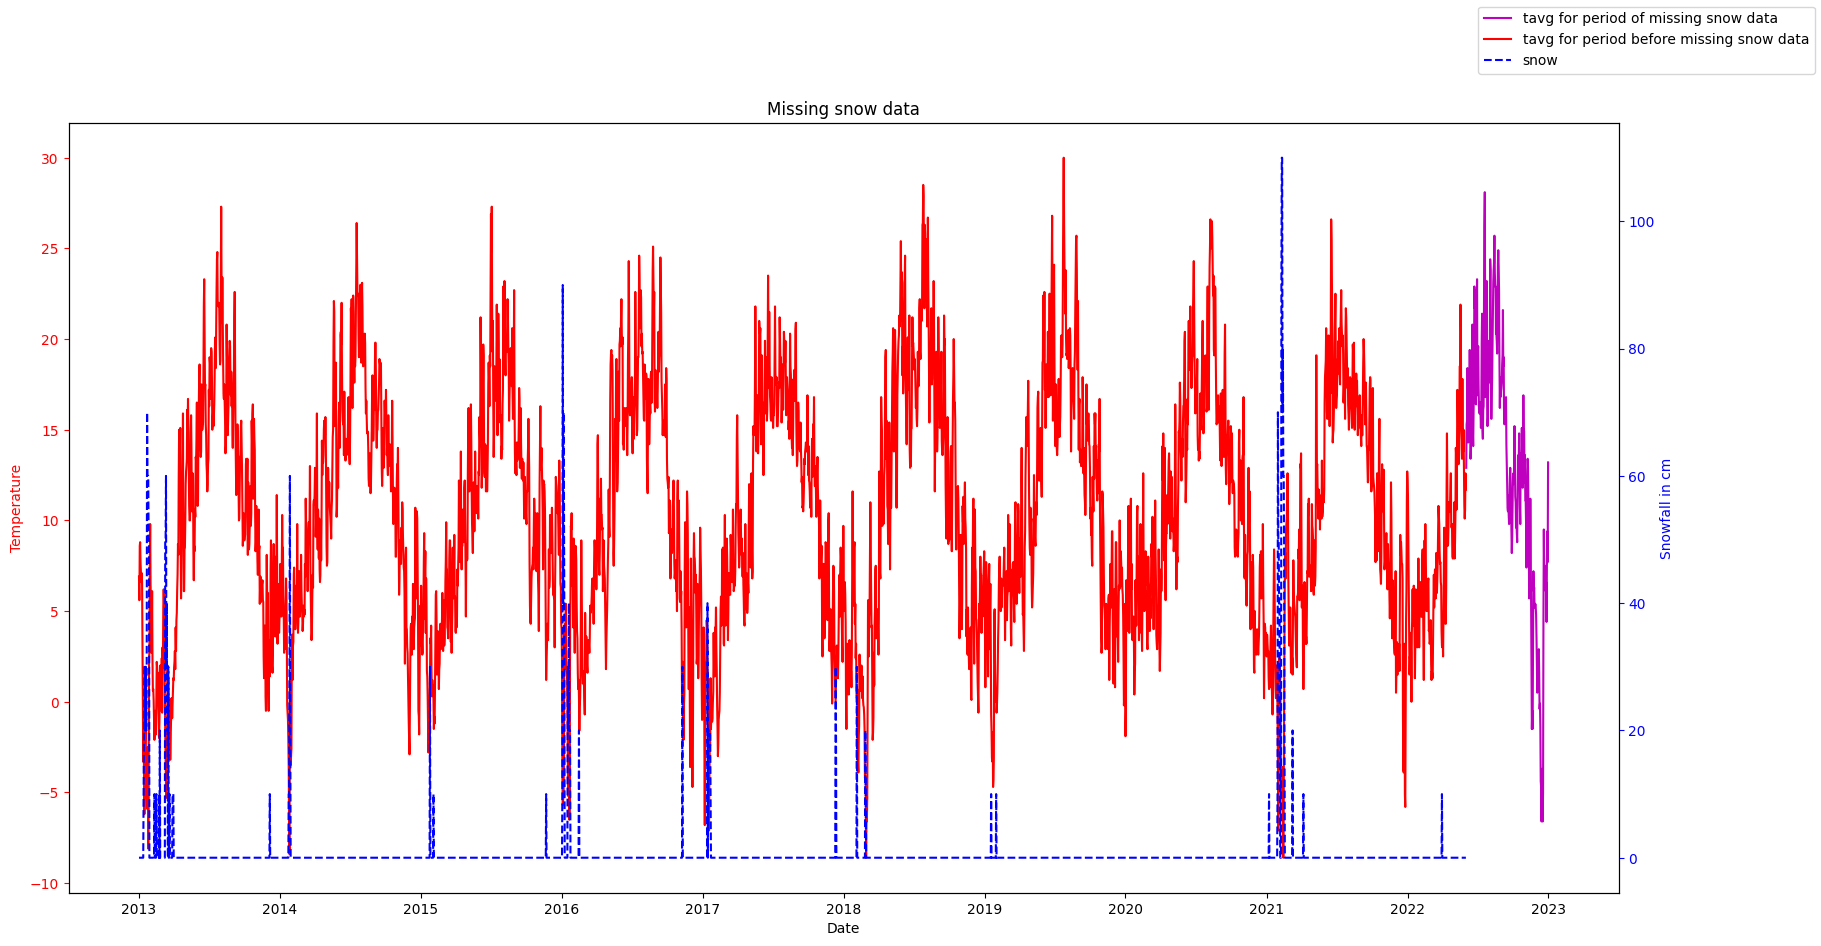

In [ ]:
# Create mask to filter for missing values in column `snow`
mask = df_weather.loc[:,"snow"].isna()

# Plot the dataset with the mask data
fig, ax = plt.subplots(figsize=(20,10))

# Make a twin axe
ax2 = ax.twinx()

# Plot the temperature corresponding to the missing snow values
ax.plot(df_weather.loc[mask,["tavg"]], "m-")
ax.plot(df_weather.loc[~mask,["tavg"]], "r-")

# Plot all snow values to see, if we can use nearby snow values to impute the
# the missing snow values
ax2.plot(df_weather.loc[:,"snow"], "b--")

# Formatting plot
fig.legend(['tavg for period of missing snow data', 'tavg for period before missing snow data', 'snow'])
ax.set_title("Missing snow data")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature", color="red")
ax.tick_params(axis="y", colors="red")
ax2.set_ylabel("Snowfall in cm", color="blue")
ax2.tick_params(axis="y", colors="blue")

As we can see, are all missing values from 2022-06-02 to 2022-12-31. This makes it likly, that the data was not measured and it is not missing because of no snow. For the most part of the missing time frame, the temperature was well in the plus degrees and only for a short period if time, the values got below $5°C$ and in the negative degrees which could make snowfall plausible. 
With further data sources, we could find out about those days and impute accordingly. However, considering that there are only very few days with possbile snow (days with temperatures ~< $5°C$) leaves us with very little uncertainty and we will just set all missing values to $0$.

In [ ]:
# Make a copy of dataframe
df_weather_imputed = df_weather.copy()

# Create a mask for filtering
mask = df_weather_imputed.loc[:,"snow"].isna()

# Set all NaN values in column `snow` to 0.0 
df_weather_imputed.loc[mask,"snow"] = 0.0

**Handling missing `wdir` values**

For the few missing values of `wdir`, we will use forward fill strategy.

In [ ]:
mask = df_weather_imputed.loc[:,"wdir"].isna()

# Forward fill the missing values of `wdir`
df_weather_imputed.loc[:,"wdir"] = df_weather_imputed.loc[:,"wdir"].fillna(method='ffill')

df_weather_imputed.loc[mask,"wdir"]

date
2013-03-31      8.0
2014-03-30    107.0
2015-03-29    210.0
2016-03-27    180.0
2017-03-26    325.0
2018-03-25    131.0
2019-03-31    204.0
2020-03-29    358.0
2021-03-28    236.0
2022-03-27    298.0
Name: wdir, dtype: float64

**Handling missing `wpgt` values**

For the few missing values of `wpgt`, we will use forward fill strategy.

In [ ]:
mask = df_weather_imputed.loc[:,"wpgt"].isna()

# Forward fill the missing values of `wpgt`
df_weather_imputed.loc[:,"wpgt"] = df_weather_imputed.loc[:,"wpgt"].fillna(method='ffill')

df_weather_imputed.loc[mask,"wpgt"]

date
2014-01-02    33.5
Name: wpgt, dtype: float64

In [ ]:
# Check if all missing values have been imputed
missing_percent(df_weather_imputed)

,Absolut missing,% missing
column,,
tavg,0,0.0
tmin,0,0.0
tmax,0,0.0
prcp,0,0.0
snow,0,0.0
wdir,0,0.0
wspd,0,0.0
wpgt,0,0.0
pres,0,0.0


All missing values have been imputed according to above mentioned strategy.

<a name="6"></a>
# 6.&nbsp;Correlation among datasets
[Content](#content)

Now that we looked at the datasets in detail, handled the outliers and imputed missing data, we will have a look on the correlation of the datasets. This will help to determine which features are usefull for training out model.

<a name="6.1."></a>
## 6.1. Correlation of weather features
[Content](#content)

First, we have a look at the correlation of the weather features in the weather dataset. This is useful, because with some machine learning algorithms, multiple features which are highly correlated among each other not be used.

In [ ]:
df_weather_imputed.corr().style.background_gradient(cmap='coolwarm')

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
tavg,1.000000,0.942186,0.977599,0.044068,-0.261730,0.023782,-0.153544,0.015764,-0.007891,0.454294
tmin,0.942186,1.000000,0.869225,0.128015,-0.273831,0.048543,-0.044611,0.077887,-0.101801,0.226506
tmax,0.977599,0.869225,1.000000,0.007292,-0.245963,-0.002197,-0.215312,-0.015538,0.040460,0.576276
prcp,0.044068,0.128015,0.007292,1.000000,-0.020643,0.026167,0.197327,0.313844,-0.335527,-0.246556
snow,-0.261730,-0.273831,-0.245963,-0.020643,1.000000,-0.109049,-0.009500,-0.050085,-0.047045,-0.068034
wdir,0.023782,0.048543,-0.002197,0.026167,-0.109049,1.000000,0.184260,0.211913,0.022532,-0.146209
wspd,-0.153544,-0.044611,-0.215312,0.197327,-0.009500,0.184260,1.000000,0.849023,-0.327510,-0.247364
wpgt,0.015764,0.077887,-0.015538,0.313844,-0.050085,0.211913,0.849023,1.000000,-0.371205,-0.127282
pres,-0.007891,-0.101801,0.040460,-0.335527,-0.047045,0.022532,-0.327510,-0.371205,1.000000,0.265934
tsun,0.454294,0.226506,0.576276,-0.246556,-0.068034,-0.146209,-0.247364,-0.127282,0.265934,1.000000


As we can see, the features `tavg`, `tmin` and `tmax` are very highly correlated. From those features it should be considered to only use one feature with shallow learning algorithms. 
Also `wspd` and `wpgt` are highly correlated. Here als well it shoul be considered, to only use one of those features.

<a name="6.2."></a>
## 6.2. Correlation cyclist and weather dataset
[Content](#content)

Next, we will create a joint dataset of `df_cyclists_imputed` and `df_weather_imputed` and also add a column with the sum of all counting stations. This we do to examine the correlations among those two datasets.



In [ ]:
# Calculate new series s_cyclist_total_replaced after imputing of values
s_cyclist_total_imputed = df_cyclist_imputed.loc[:,:].sum(axis=1)
s_cyclist_total_imputed.name = "Total"

# Add the pandas series `s_cyclist_total_imputed` to the dataframe `df_cyclist_imputed` 
# and create new dataframe `df`
df_cyclist_weather_imputed = pd.concat([df_cyclist_imputed, s_cyclist_total_imputed], axis=1)
# Add the weather dataframe `df_weather_imputed` to the dataframe `df`
df_cyclist_weather_imputed = pd.concat([df_cyclist_weather_imputed, df_weather_imputed], axis=1)

# Check new dataframe
df_cyclist_weather_imputed.head()

,GrafMoltkeStrEast,GrafMoltkeStrWest,HastedterBrStr,LangemarckStrEast,LangemarckStrWest,Osterdeich,RadwegKleineWeser,SchwachhauserRing,WachmannStrAusSouth,WachmannStrEinNorth,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391.0,514.0,267.0,...,6.9,3.5,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829.0,1786.0,1456.0,...,5.6,4.2,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196.0,2412.0,2035.0,...,8.6,6.0,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418.0,964.0,702.0,...,8.8,6.8,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0
2013-01-05,1013.0,1011.0,1284.0,1856.0,1621.0,4128.0,4256.0,3075.0,2065.0,1377.0,...,7.7,6.5,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0


In [ ]:
# Create empty dataframe
df_corr = pd.DataFrame()

# Loop over dataframe `df_cyclist_weather_imputed` to create correlation columns
for name in df_cyclist_weather_imputed.columns.values[0:13]:

  # Prepare the cols for checking correlation
  cols = np.append(np.array([name]), df_weather_imputed.columns.values)

  # Calculate the correlation for a single station
  # This creates a pandas series object
  arr_corr = df_cyclist_weather_imputed.loc[:,cols].corr()

  # Concatenate each pandas series object with the correlation dataframe
  df_corr = pd.concat([df_corr, arr_corr[name][1:]], axis=1)
  
# Print and apply a color style
df_corr.style.background_gradient(cmap='coolwarm')

,GrafMoltkeStrEast,GrafMoltkeStrWest,HastedterBrStr,LangemarckStrEast,LangemarckStrWest,Osterdeich,RadwegKleineWeser,SchwachhauserRing,WachmannStrAusSouth,WachmannStrEinNorth,WilhelmKaisenBrEast,WilhelmKaisenBrWest,Total
tavg,0.326223,0.321210,0.452049,0.361526,0.333588,0.344911,0.446075,0.420372,0.302091,0.236574,0.362167,0.329640,0.394357
tmin,0.270858,0.265515,0.359129,0.298864,0.277710,0.271063,0.362712,0.324335,0.256301,0.194006,0.302320,0.278002,0.322487
tmax,0.338873,0.334815,0.480089,0.374603,0.344821,0.368240,0.467326,0.454247,0.310322,0.247736,0.374197,0.338522,0.412361
prcp,-0.124528,-0.121898,-0.136187,-0.118451,-0.108385,-0.123995,-0.116609,-0.159064,-0.101735,-0.109539,-0.116518,-0.101408,-0.129480
snow,-0.130650,-0.124174,-0.094295,-0.109003,-0.087319,-0.087719,-0.140187,-0.110182,-0.109541,-0.107724,-0.116224,-0.106997,-0.120169
wdir,-0.014862,-0.017768,-0.047279,-0.013009,-0.026970,-0.036285,-0.043446,-0.033137,-0.004500,-0.022878,-0.009726,0.000599,-0.024786
wspd,-0.161588,-0.158163,-0.212615,-0.178526,-0.172103,-0.204240,-0.198695,-0.224422,-0.145859,-0.152817,-0.176145,-0.155837,-0.197519
wpgt,-0.103972,-0.099365,-0.129736,-0.121432,-0.115687,-0.134455,-0.120831,-0.147521,-0.093640,-0.104432,-0.108391,-0.097600,-0.125897
pres,0.097805,0.093654,0.135242,0.105028,0.093917,0.118565,0.111761,0.144668,0.096003,0.097777,0.094755,0.098846,0.117626
tsun,0.254697,0.257475,0.419867,0.272244,0.260603,0.321235,0.379176,0.413276,0.225807,0.186757,0.276029,0.242765,0.326008


The correlation matrix gives us information, which features correlate with the numbers of cyclists. Warm colors indicate a positive correlation and cold colors indicate a negative correlation. 

Most correlations are weak, however there is a correlation with `tavg`, `tmin`, `tmax` and `tsun`. Those are clear indicators for good weather and therefore expected. 
A weak negative correlation is given for `wspd` which has a stronger correlation than `prcp` and `snow` which is unexpected. 
According to the data, rainy and snowy days have not a strong influence on the amount of cyclers in the city.  

The winddirection `wdir` has no correlation. 

By this observation, we will later drop the feature `wdir` entirely, as there is no correlation to the amount of cyclers. 

<a name="6.3."></a>
## 6.3. Correlation cyclist and holiday dataset
[Content](#content)

Next, we will look at the correlation between cyclist data and holidays

In [ ]:
# Create df_cyclist_holidays_imputed
df_cyclist_holidays_imputed = pd.concat([s_cyclist_total_imputed, df_holidays], axis=1)
df_cyclist_holidays_imputed["Holiday"] = df_cyclist_holidays_imputed["Holiday"].fillna("None")

# Plot the boxplot
fig = px.box(df_cyclist_holidays_imputed, x="Holiday", y="Total")

fig.update_layout(title="Data distribution for different holidays")

fig.show()

The diagram clearly shows, that the values for certain holidays follow a certain scheme. E.g., the values for `Neujahr` or `1. Weihnachtstag` have a very small inter quartile range and very short whiskers and therefore only a small range of data. The comparison with `None` holiday clearyl shows the impact of a holiday.

Because of this, we will include those data for our machine learning algorithm.

<a name="6.4."></a>
## 6.4. Correlation cyclist and vacation dataset
[Content](#content)

Next, we will look at the correlation between cyclist data and vacation.

In [ ]:
# Create df_cyclist_holidays_imputed
df_cyclist_vacation_imputed = pd.concat([s_cyclist_total_imputed, df_vacation], axis=1)
df_cyclist_vacation_imputed["Vacation"] = df_cyclist_vacation_imputed["Vacation"].fillna("None")

# Plot the boxplot
fig = px.box(df_cyclist_vacation_imputed, x="Vacation", y="Total")

fig.update_layout(title="Data distribution for different vacations")

fig.show()

For vacations, the distribution of data compared to non-vacation is not as clear comapred to holidays. However, also here the trend can be seen that during vacation the overall spread of values is lower (smaller inter quartile range) with less smaller and higher values as well as often smaller median values. 

Because of this, we will include those data for our machine learning algorithm.

<a name="7"></a>
# 7.&nbsp;Locations of counting stations
[Content](#content)


The following map shows the locations of each counting stations.

In [ ]:
# Center of Bremen
center = (53.0766482, 8.8166905)
m = Map(center=center, zoom=12)

markers = []
length = df_geolocations.shape[0]

# Define the color range and the corresponding values
min_val = df_cyclist_replaced.loc[:,:].sum().min()
max_val = df_cyclist_replaced.loc[:,:].sum().max()

color_range = {'gray': (0, 0.2*max_val), 'green': (0.2*max_val, 0.4*max_val), 
               'yellow': (0.4*max_val, 0.6*max_val), 'orange':  (0.6*max_val, 0.8*max_val),
               'red': (0.8*max_val, float('inf'))}

# For every station in the dataframe, add the coordinates to the markers array
for station in df_geolocations.index:

  value = df_cyclist_replaced.loc[:,:].sum()[station]
  for color, range_ in color_range.items():

    if value >= range_[0] and value < range_[1]:

      # Only CircleMarker supports different colors
      markers.append(CircleMarker(location=list(df_geolocations.loc[station,:].values), 
                            draggable=False, color=color))
      break

# Add markers to the layer to draw
for marker in markers:
  m.add_layer(marker)

display(m)

Map(center=[53.0766482, 8.8166905], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

The map shows the relative amount of traffic compared to the highest value measured. The coloring code is:

<center>

Color code range

| Color | Range |
| :-- | --: |
| Gray | 0% - 20% |
| Green | 20% - 40% |
| Yellow | 40% - 60% |
| Orange | 60% - 80% |
| Red | 80% - 100% |

</center>

As often in Bremen cyclers do not use the right side of the street but also often drive on the left side, counting stations should be looked at in pairs in case there is one station per each side of the street. This explains for example the huge gap between WilhelmKaisenBrEast and WilhelmKaisenBrWest. If cyclers were to strictly use the right lane, the values on each side would be expected to be much closer together (for both the way and way back).

The highest traffic can be seen on the Wilhelm-Kaisen-Brücke as well as Wachmann Strasse. Those stations lay on the "east-west" connection of the city and connects the west part of the city with the commercial and university part in the east of the city. 

Also high traffic can be seen around the area of the "Werdersee" with the stations "Wilhelm-Kaisen-Brücke", "Osterdeich", "Hastedter-Brücken-Strasse" and "Radweg kleine Weser". Those are all stations mainly connecting or leading to bridges to connect both sides of the river with each other.

<a name="8"></a>
#8.&nbsp;Summary and next steps
[Content](#content)

**Summary:**

In this notebook we have seen, that all the counting stations have a similar behaviour, are Gaussian and mainly just differenciate by the amount (scaling) of the value (number of cyclists). This means, that any properly trained ML algorithm should be capable of forecasting all the stations with similar accuarcy. Also we saw, that the COVID pandemic did not have a measurable impact on the overall amount. Therfore we do not have to take special actions during the training of our model for this period of time. 

To prepare the dataset, we eliminated the outliers like 0-Values and values that are greater than 3 times the standard deviation. Then we imputed those values with the forward fill strategy.

For the weather dataset we imputed the missing `snow` values after careful consideration with 0-values and just forward fill strategy on `wdir` and `wpgt`.

Regarding the correlation, the main features to consider are `tmin`, `tmax`, `tavg` and `tsun`. The feature `wdir` is a feature that we could propably drop entirely, since there is no correlation. When training a machine learning model, we need to consider to not use features that are highly correlated among each other, if the algorithm is sensitive to it. 

The day of the week has also an impact on the values. The highest count can be observed from Monday to Friday and from there declining until Sunday. From there on the values rise again for the beginning of the next week.

Certain holidays and vacations have a strong influence on the data and will therefore be used for our machine learning model.

**Next steps:**

With the gathered information, we will try to fit different models to the data. The models we will try are

* Autoregressive Integrated Moving Average (ARIMA)
* XGBoost
* Recurrent Neural Networks (RNNs)

The models will be trained in the notebook [3_Modeling](...).

<a name="9"></a>
# 9. Export of training dataset
[Content](#Content)

Lastly, we will export the current datasets with imputed values as one big matrix with all values included, to train the models on.

In [ ]:
# Create dataset to export

# Add total column to dataset `df_cyclist_imputed`
df = pd.concat([df_cyclist_imputed, s_cyclist_total_imputed], axis=1)

# Add imputed waether data to dataframe
df = pd.concat([df, df_weather_imputed], axis=1)

# Add column weekday to dataframe
df = pd.concat([s_weekdays, df], axis=1)

# Add column weekday to dataframe
df = pd.concat([df, df_holidays, df_vacation], axis=1)

# Check dataframe
df.head()

,Weekday,GrafMoltkeStrEast,GrafMoltkeStrWest,HastedterBrStr,LangemarckStrEast,LangemarckStrWest,Osterdeich,RadwegKleineWeser,SchwachhauserRing,WachmannStrAusSouth,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Holiday,Vacation
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391.0,514.0,...,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0,Neujahr,Weihnachtsferien
2013-01-02,2,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829.0,1786.0,...,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30,NaN,Weihnachtsferien
2013-01-03,3,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196.0,2412.0,...,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0,NaN,Weihnachtsferien
2013-01-04,4,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418.0,964.0,...,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0,NaN,Weihnachtsferien
2013-01-05,5,1013.0,1011.0,1284.0,1856.0,1621.0,4128.0,4256.0,3075.0,2065.0,...,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0,NaN,Weihnachtsferien


In [ ]:
# Todays date
#today = datetime.date.today()

# Write df to path with formated name
#df.to_csv(f"{path_data}/03_training_data/{today}_df_full.csv")